<a href="https://colab.research.google.com/github/psantaniello95/Bridge-Damage-Identification-Using-Deep-Neural-Networks-on-Time-Frequency-Signals-Representation/blob/main/ImportTimeSeries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#mount the google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#import libraries
import scipy
import scipy.io
import numpy as np
import tensorflow as tf
from sklearn import datasets
from sklearn.model_selection import train_test_split, cross_val_score, ShuffleSplit, GridSearchCV
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils.multiclass import unique_labels
import matplotlib.pyplot as plt
import matplotlib
import random
import keras
import cv2 as cv

In [ ]:
#first reference measurement, prior to Koppigen pier installation -> Ambient Vibration Test class 0 - SCENARIO 1 - NO DAMAGE
Data_1=scipy.io.loadmat('/content/drive/My Drive/Master-Thesis-BridgeDamageDetection/Dataset/pdt_01-08/01/avt/01setup01.mat')
Data_2=scipy.io.loadmat('/content/drive/My Drive/Master-Thesis-BridgeDamageDetection/Dataset/pdt_01-08/01/avt/01setup02.mat')
Data_3=scipy.io.loadmat('/content/drive/My Drive/Master-Thesis-BridgeDamageDetection/Dataset/pdt_01-08/01/avt/01setup03.mat')
Data_4=scipy.io.loadmat('/content/drive/My Drive/Master-Thesis-BridgeDamageDetection/Dataset/pdt_01-08/01/avt/01setup04.mat')
Data_5=scipy.io.loadmat('/content/drive/My Drive/Master-Thesis-BridgeDamageDetection/Dataset/pdt_01-08/01/avt/01setup05.mat')
Data_6=scipy.io.loadmat('/content/drive/My Drive/Master-Thesis-BridgeDamageDetection/Dataset/pdt_01-08/01/avt/01setup06.mat')
Data_7=scipy.io.loadmat('/content/drive/My Drive/Master-Thesis-BridgeDamageDetection/Dataset/pdt_01-08/01/avt/01setup07.mat')
Data_8=scipy.io.loadmat('/content/drive/My Drive/Master-Thesis-BridgeDamageDetection/Dataset/pdt_01-08/01/avt/01setup08.mat')
Data_9=scipy.io.loadmat('/content/drive/My Drive/Master-Thesis-BridgeDamageDetection/Dataset/pdt_01-08/01/avt/01setup09.mat')

In [ ]:
#second reference measurement, after Koppigen pier installation -> Ambient Vibration Test class 0 - SCENARIO 2 - NO DAMAGE
Data_12=scipy.io.loadmat('/content/drive/My Drive/Master-Thesis-BridgeDamageDetection/Dataset/pdt_01-08/02/avt/02setup01.mat')
Data_22=scipy.io.loadmat('/content/drive/My Drive/Master-Thesis-BridgeDamageDetection/Dataset/pdt_01-08/02/avt/02setup02.mat')
Data_32=scipy.io.loadmat('/content/drive/My Drive/Master-Thesis-BridgeDamageDetection/Dataset/pdt_01-08/02/avt/02setup03.mat')
Data_42=scipy.io.loadmat('/content/drive/My Drive/Master-Thesis-BridgeDamageDetection/Dataset/pdt_01-08/02/avt/02setup04.mat')
Data_52=scipy.io.loadmat('/content/drive/My Drive/Master-Thesis-BridgeDamageDetection/Dataset/pdt_01-08/02/avt/02setup05.mat')
Data_62=scipy.io.loadmat('/content/drive/My Drive/Master-Thesis-BridgeDamageDetection/Dataset/pdt_01-08/02/avt/02setup06.mat')
Data_72=scipy.io.loadmat('/content/drive/My Drive/Master-Thesis-BridgeDamageDetection/Dataset/pdt_01-08/02/avt/02setup07.mat')
Data_82=scipy.io.loadmat('/content/drive/My Drive/Master-Thesis-BridgeDamageDetection/Dataset/pdt_01-08/02/avt/02setup08.mat')
Data_92=scipy.io.loadmat('/content/drive/My Drive/Master-Thesis-BridgeDamageDetection/Dataset/pdt_01-08/02/avt/02setup09.mat')

In [ ]:
#Scenario: Settlement of fundation -> 20 mm Settlement , Ambient Vibration Test class 0 - SCENARIO 3 - REVERSIBLE DAMAGE
Data_13=scipy.io.loadmat('/content/drive/My Drive/Master-Thesis-BridgeDamageDetection/Dataset/pdt_01-08/03/avt/03setup01.mat')
Data_23=scipy.io.loadmat('/content/drive/My Drive/Master-Thesis-BridgeDamageDetection/Dataset/pdt_01-08/03/avt/03setup02.mat')
Data_33=scipy.io.loadmat('/content/drive/My Drive/Master-Thesis-BridgeDamageDetection/Dataset/pdt_01-08/03/avt/03setup03.mat')
Data_43=scipy.io.loadmat('/content/drive/My Drive/Master-Thesis-BridgeDamageDetection/Dataset/pdt_01-08/03/avt/03setup04.mat')
Data_53=scipy.io.loadmat('/content/drive/My Drive/Master-Thesis-BridgeDamageDetection/Dataset/pdt_01-08/03/avt/03setup05.mat')
Data_63=scipy.io.loadmat('/content/drive/My Drive/Master-Thesis-BridgeDamageDetection/Dataset/pdt_01-08/03/avt/03setup06.mat')
Data_73=scipy.io.loadmat('/content/drive/My Drive/Master-Thesis-BridgeDamageDetection/Dataset/pdt_01-08/03/avt/03setup07.mat')
Data_83=scipy.io.loadmat('/content/drive/My Drive/Master-Thesis-BridgeDamageDetection/Dataset/pdt_01-08/03/avt/03setup08.mat')
Data_93=scipy.io.loadmat('/content/drive/My Drive/Master-Thesis-BridgeDamageDetection/Dataset/pdt_01-08/03/avt/03setup09.mat')

In [ ]:
#Scenario: Settlement of fundation -> 40 mm Settlement , Ambient Vibration Test class 1 - SCENARIO 4 - REVERSIBLE DAMAGE
Data_14=scipy.io.loadmat('/content/drive/My Drive/Master-Thesis-BridgeDamageDetection/Dataset/pdt_01-08/04/avt/04setup01.mat')
Data_24=scipy.io.loadmat('/content/drive/My Drive/Master-Thesis-BridgeDamageDetection/Dataset/pdt_01-08/04/avt/04setup02.mat')
Data_34=scipy.io.loadmat('/content/drive/My Drive/Master-Thesis-BridgeDamageDetection/Dataset/pdt_01-08/04/avt/04setup03.mat')
Data_44=scipy.io.loadmat('/content/drive/My Drive/Master-Thesis-BridgeDamageDetection/Dataset/pdt_01-08/04/avt/04setup04.mat')
Data_54=scipy.io.loadmat('/content/drive/My Drive/Master-Thesis-BridgeDamageDetection/Dataset/pdt_01-08/04/avt/04setup05.mat')
Data_64=scipy.io.loadmat('/content/drive/My Drive/Master-Thesis-BridgeDamageDetection/Dataset/pdt_01-08/04/avt/04setup06.mat')
Data_74=scipy.io.loadmat('/content/drive/My Drive/Master-Thesis-BridgeDamageDetection/Dataset/pdt_01-08/04/avt/04setup07.mat')
Data_84=scipy.io.loadmat('/content/drive/My Drive/Master-Thesis-BridgeDamageDetection/Dataset/pdt_01-08/04/avt/04setup08.mat')
Data_94=scipy.io.loadmat('/content/drive/My Drive/Master-Thesis-BridgeDamageDetection/Dataset/pdt_01-08/04/avt/04setup09.mat')

In [ ]:
#Scenario: Settlement of fundation -> 80 mm Settlement , Ambient Vibration Test class 1 - SCENARIO 5 - REVERSIBLE DAMAGE
Data_15=scipy.io.loadmat('/content/drive/My Drive/Master-Thesis-BridgeDamageDetection/Dataset/pdt_01-08/05/avt/05setup01.mat')
Data_25=scipy.io.loadmat('/content/drive/My Drive/Master-Thesis-BridgeDamageDetection/Dataset/pdt_01-08/05/avt/05setup02.mat')
Data_35=scipy.io.loadmat('/content/drive/My Drive/Master-Thesis-BridgeDamageDetection/Dataset/pdt_01-08/05/avt/05setup03.mat')
Data_45=scipy.io.loadmat('/content/drive/My Drive/Master-Thesis-BridgeDamageDetection/Dataset/pdt_01-08/05/avt/05setup04.mat')
Data_55=scipy.io.loadmat('/content/drive/My Drive/Master-Thesis-BridgeDamageDetection/Dataset/pdt_01-08/05/avt/05setup05.mat')
Data_65=scipy.io.loadmat('/content/drive/My Drive/Master-Thesis-BridgeDamageDetection/Dataset/pdt_01-08/05/avt/05setup06.mat')
Data_75=scipy.io.loadmat('/content/drive/My Drive/Master-Thesis-BridgeDamageDetection/Dataset/pdt_01-08/05/avt/05setup07.mat')
Data_85=scipy.io.loadmat('/content/drive/My Drive/Master-Thesis-BridgeDamageDetection/Dataset/pdt_01-08/05/avt/05setup08.mat')
Data_95=scipy.io.loadmat('/content/drive/My Drive/Master-Thesis-BridgeDamageDetection/Dataset/pdt_01-08/05/avt/05setup09.mat')

In [ ]:
#Scenario: Settlement of fundation -> 95 mm Settlement , Ambient Vibration Test class 1 - SCENARIO 6 - REVERSIBLE DAMAGE
Data_16=scipy.io.loadmat('/content/drive/My Drive/Master-Thesis-BridgeDamageDetection/Dataset/pdt_01-08/06/avt/06setup01.mat')
Data_26=scipy.io.loadmat('/content/drive/My Drive/Master-Thesis-BridgeDamageDetection/Dataset/pdt_01-08/06/avt/06setup02.mat')
Data_36=scipy.io.loadmat('/content/drive/My Drive/Master-Thesis-BridgeDamageDetection/Dataset/pdt_01-08/06/avt/06setup03.mat')
Data_46=scipy.io.loadmat('/content/drive/My Drive/Master-Thesis-BridgeDamageDetection/Dataset/pdt_01-08/06/avt/06setup04.mat')
Data_56=scipy.io.loadmat('/content/drive/My Drive/Master-Thesis-BridgeDamageDetection/Dataset/pdt_01-08/06/avt/06setup05.mat')
Data_66=scipy.io.loadmat('/content/drive/My Drive/Master-Thesis-BridgeDamageDetection/Dataset/pdt_01-08/06/avt/06setup06.mat')
Data_76=scipy.io.loadmat('/content/drive/My Drive/Master-Thesis-BridgeDamageDetection/Dataset/pdt_01-08/06/avt/06setup07.mat')
Data_86=scipy.io.loadmat('/content/drive/My Drive/Master-Thesis-BridgeDamageDetection/Dataset/pdt_01-08/06/avt/06setup08.mat')
Data_96=scipy.io.loadmat('/content/drive/My Drive/Master-Thesis-BridgeDamageDetection/Dataset/pdt_01-08/06/avt/06setup09.mat')

In [ ]:
#Scenario: Tilt of fundation -> 95 Relative diff. 6mm at koppigen pier  , Ambient Vibration Test class 1 - SCENARIO 7 - REVERSIBLE DAMAGE
Data_17=scipy.io.loadmat('/content/drive/My Drive/Master-Thesis-BridgeDamageDetection/Dataset/pdt_01-08/07/avt/07setup01.mat')
Data_27=scipy.io.loadmat('/content/drive/My Drive/Master-Thesis-BridgeDamageDetection/Dataset/pdt_01-08/07/avt/07setup02.mat')
Data_37=scipy.io.loadmat('/content/drive/My Drive/Master-Thesis-BridgeDamageDetection/Dataset/pdt_01-08/07/avt/07setup03.mat')
Data_47=scipy.io.loadmat('/content/drive/My Drive/Master-Thesis-BridgeDamageDetection/Dataset/pdt_01-08/07/avt/07setup04.mat')
Data_57=scipy.io.loadmat('/content/drive/My Drive/Master-Thesis-BridgeDamageDetection/Dataset/pdt_01-08/07/avt/07setup05.mat')
Data_67=scipy.io.loadmat('/content/drive/My Drive/Master-Thesis-BridgeDamageDetection/Dataset/pdt_01-08/07/avt/07setup06.mat')
Data_77=scipy.io.loadmat('/content/drive/My Drive/Master-Thesis-BridgeDamageDetection/Dataset/pdt_01-08/07/avt/07setup07.mat')
Data_87=scipy.io.loadmat('/content/drive/My Drive/Master-Thesis-BridgeDamageDetection/Dataset/pdt_01-08/07/avt/07setup08.mat')
Data_97=scipy.io.loadmat('/content/drive/My Drive/Master-Thesis-BridgeDamageDetection/Dataset/pdt_01-08/07/avt/07setup09.mat')

In [ ]:
#Scenario: Reference Measurements , Ambient Vibration Test class 0 - SCENARIO 8 - NO DAMAGE
Data_18=scipy.io.loadmat('/content/drive/My Drive/Master-Thesis-BridgeDamageDetection/Dataset/pdt_01-08/08/avt/08setup01.mat')
Data_28=scipy.io.loadmat('/content/drive/My Drive/Master-Thesis-BridgeDamageDetection/Dataset/pdt_01-08/08/avt/08setup02.mat')
Data_38=scipy.io.loadmat('/content/drive/My Drive/Master-Thesis-BridgeDamageDetection/Dataset/pdt_01-08/08/avt/08setup03.mat')
Data_48=scipy.io.loadmat('/content/drive/My Drive/Master-Thesis-BridgeDamageDetection/Dataset/pdt_01-08/08/avt/08setup04.mat')
Data_58=scipy.io.loadmat('/content/drive/My Drive/Master-Thesis-BridgeDamageDetection/Dataset/pdt_01-08/08/avt/08setup05.mat')
Data_68=scipy.io.loadmat('/content/drive/My Drive/Master-Thesis-BridgeDamageDetection/Dataset/pdt_01-08/08/avt/08setup06.mat')
Data_78=scipy.io.loadmat('/content/drive/My Drive/Master-Thesis-BridgeDamageDetection/Dataset/pdt_01-08/08/avt/08setup07.mat')
Data_88=scipy.io.loadmat('/content/drive/My Drive/Master-Thesis-BridgeDamageDetection/Dataset/pdt_01-08/08/avt/08setup08.mat')
Data_98=scipy.io.loadmat('/content/drive/My Drive/Master-Thesis-BridgeDamageDetection/Dataset/pdt_01-08/08/avt/08setup09.mat')

In [ ]:
#Scenario: Spalling of concrete 12 M^2, Ambient Vibration Test class 2 - SCENARIO 9 - IRREVERSIBLE DAMAGE
Data_19=scipy.io.loadmat('/content/drive/My Drive/Master-Thesis-BridgeDamageDetection/Dataset/pdt_09_17/09/avt/09setup01.mat')
Data_29=scipy.io.loadmat('/content/drive/My Drive/Master-Thesis-BridgeDamageDetection/Dataset/pdt_09_17/09/avt/09setup02.mat')
Data_39=scipy.io.loadmat('/content/drive/My Drive/Master-Thesis-BridgeDamageDetection/Dataset/pdt_09_17/09/avt/09setup03.mat')
Data_49=scipy.io.loadmat('/content/drive/My Drive/Master-Thesis-BridgeDamageDetection/Dataset/pdt_09_17/09/avt/09setup04.mat')
Data_59=scipy.io.loadmat('/content/drive/My Drive/Master-Thesis-BridgeDamageDetection/Dataset/pdt_09_17/09/avt/09setup05.mat')
Data_69=scipy.io.loadmat('/content/drive/My Drive/Master-Thesis-BridgeDamageDetection/Dataset/pdt_09_17/09/avt/09setup06.mat')
Data_79=scipy.io.loadmat('/content/drive/My Drive/Master-Thesis-BridgeDamageDetection/Dataset/pdt_09_17/09/avt/09setup07.mat')
Data_89=scipy.io.loadmat('/content/drive/My Drive/Master-Thesis-BridgeDamageDetection/Dataset/pdt_09_17/09/avt/09setup08.mat')
Data_99=scipy.io.loadmat('/content/drive/My Drive/Master-Thesis-BridgeDamageDetection/Dataset/pdt_09_17/09/avt/09setup09.mat')

In [ ]:
#Scenario: Spalling of concrete 24 M^2, Ambient Vibration Test class 2 - SCENARIO 10 - IRREVERSIBLE DAMAGE
Data_110=scipy.io.loadmat('/content/drive/My Drive/Master-Thesis-BridgeDamageDetection/Dataset/pdt_09_17/10/avt/10setup01.mat')
Data_210=scipy.io.loadmat('/content/drive/My Drive/Master-Thesis-BridgeDamageDetection/Dataset/pdt_09_17/10/avt/10setup02.mat')
Data_310=scipy.io.loadmat('/content/drive/My Drive/Master-Thesis-BridgeDamageDetection/Dataset/pdt_09_17/10/avt/10setup03.mat')
Data_410=scipy.io.loadmat('/content/drive/My Drive/Master-Thesis-BridgeDamageDetection/Dataset/pdt_09_17/10/avt/10setup04.mat')
Data_510=scipy.io.loadmat('/content/drive/My Drive/Master-Thesis-BridgeDamageDetection/Dataset/pdt_09_17/10/avt/10setup05.mat')
Data_610=scipy.io.loadmat('/content/drive/My Drive/Master-Thesis-BridgeDamageDetection/Dataset/pdt_09_17/10/avt/10setup06.mat')
Data_710=scipy.io.loadmat('/content/drive/My Drive/Master-Thesis-BridgeDamageDetection/Dataset/pdt_09_17/10/avt/10setup07.mat')
Data_810=scipy.io.loadmat('/content/drive/My Drive/Master-Thesis-BridgeDamageDetection/Dataset/pdt_09_17/10/avt/10setup08.mat')
Data_910=scipy.io.loadmat('/content/drive/My Drive/Master-Thesis-BridgeDamageDetection/Dataset/pdt_09_17/10/avt/10setup09.mat')

In [ ]:
#Scenario: LandSlide, Ambient Vibration Test class 2 - SCENARIO 11 - IRREVERSIBLE DAMAGE
Data_111=scipy.io.loadmat('/content/drive/My Drive/Master-Thesis-BridgeDamageDetection/Dataset/pdt_09_17/11/avt/11setup01.mat')
Data_211=scipy.io.loadmat('/content/drive/My Drive/Master-Thesis-BridgeDamageDetection/Dataset/pdt_09_17/11/avt/11setup02.mat')
Data_311=scipy.io.loadmat('/content/drive/My Drive/Master-Thesis-BridgeDamageDetection/Dataset/pdt_09_17/11/avt/11setup03.mat')
Data_411=scipy.io.loadmat('/content/drive/My Drive/Master-Thesis-BridgeDamageDetection/Dataset/pdt_09_17/11/avt/11setup04.mat')
Data_511=scipy.io.loadmat('/content/drive/My Drive/Master-Thesis-BridgeDamageDetection/Dataset/pdt_09_17/11/avt/11setup05.mat')
Data_611=scipy.io.loadmat('/content/drive/My Drive/Master-Thesis-BridgeDamageDetection/Dataset/pdt_09_17/11/avt/11setup06.mat')
Data_711=scipy.io.loadmat('/content/drive/My Drive/Master-Thesis-BridgeDamageDetection/Dataset/pdt_09_17/11/avt/11setup07.mat')
Data_811=scipy.io.loadmat('/content/drive/My Drive/Master-Thesis-BridgeDamageDetection/Dataset/pdt_09_17/11/avt/11setup08.mat')
Data_911=scipy.io.loadmat('/content/drive/My Drive/Master-Thesis-BridgeDamageDetection/Dataset/pdt_09_17/11/avt/11setup09.mat')

In [ ]:
#Scenario: Failure of the concrete hinges abutment piers, Ambient Vibration Test class 2 - SCENARIO 12 - IRREVERSIBLE DAMAGE
Data_112=scipy.io.loadmat('/content/drive/My Drive/Master-Thesis-BridgeDamageDetection/Dataset/pdt_09_17/12/avt/12setup01.mat')
Data_212=scipy.io.loadmat('/content/drive/My Drive/Master-Thesis-BridgeDamageDetection/Dataset/pdt_09_17/12/avt/12setup02.mat')
Data_312=scipy.io.loadmat('/content/drive/My Drive/Master-Thesis-BridgeDamageDetection/Dataset/pdt_09_17/12/avt/12setup03.mat')
Data_412=scipy.io.loadmat('/content/drive/My Drive/Master-Thesis-BridgeDamageDetection/Dataset/pdt_09_17/12/avt/12setup04.mat')
Data_512=scipy.io.loadmat('/content/drive/My Drive/Master-Thesis-BridgeDamageDetection/Dataset/pdt_09_17/12/avt/12setup05.mat')
Data_612=scipy.io.loadmat('/content/drive/My Drive/Master-Thesis-BridgeDamageDetection/Dataset/pdt_09_17/12/avt/12setup06.mat')
Data_712=scipy.io.loadmat('/content/drive/My Drive/Master-Thesis-BridgeDamageDetection/Dataset/pdt_09_17/12/avt/12setup07.mat')
Data_812=scipy.io.loadmat('/content/drive/My Drive/Master-Thesis-BridgeDamageDetection/Dataset/pdt_09_17/12/avt/12setup08.mat')
Data_912=scipy.io.loadmat('/content/drive/My Drive/Master-Thesis-BridgeDamageDetection/Dataset/pdt_09_17/12/avt/12setup09.mat')

In [ ]:
#Scenario: Failure of abchor heads of post tensioning cable, Ambient Vibration Test class 2 - SCENARIO 14 -  IRREVERSIBLE DAMAGE
Data_114=scipy.io.loadmat('/content/drive/My Drive/Master-Thesis-BridgeDamageDetection/Dataset/pdt_09_17/14/avt/14setup01.mat')
Data_214=scipy.io.loadmat('/content/drive/My Drive/Master-Thesis-BridgeDamageDetection/Dataset/pdt_09_17/14/avt/14setup02.mat')
Data_314=scipy.io.loadmat('/content/drive/My Drive/Master-Thesis-BridgeDamageDetection/Dataset/pdt_09_17/14/avt/14setup03.mat')
Data_414=scipy.io.loadmat('/content/drive/My Drive/Master-Thesis-BridgeDamageDetection/Dataset/pdt_09_17/14/avt/14setup04.mat')
Data_514=scipy.io.loadmat('/content/drive/My Drive/Master-Thesis-BridgeDamageDetection/Dataset/pdt_09_17/14/avt/14setup05.mat')
Data_614=scipy.io.loadmat('/content/drive/My Drive/Master-Thesis-BridgeDamageDetection/Dataset/pdt_09_17/14/avt/14setup06.mat')
Data_714=scipy.io.loadmat('/content/drive/My Drive/Master-Thesis-BridgeDamageDetection/Dataset/pdt_09_17/14/avt/14setup07.mat')
Data_814=scipy.io.loadmat('/content/drive/My Drive/Master-Thesis-BridgeDamageDetection/Dataset/pdt_09_17/14/avt/14setup08.mat')
Data_914=scipy.io.loadmat('/content/drive/My Drive/Master-Thesis-BridgeDamageDetection/Dataset/pdt_09_17/14/avt/14setup09.mat')

In [ ]:
#Scenario: 4 Tensodns cut, Ambient Vibration Test class 2 - SCENARIO 16 - IRREVERSIBLE DAMAGE
Data_116=scipy.io.loadmat('/content/drive/My Drive/Master-Thesis-BridgeDamageDetection/Dataset/pdt_09_17/16/avt/16setup01.mat')
Data_216=scipy.io.loadmat('/content/drive/My Drive/Master-Thesis-BridgeDamageDetection/Dataset/pdt_09_17/16/avt/16setup02.mat')
Data_316=scipy.io.loadmat('/content/drive/My Drive/Master-Thesis-BridgeDamageDetection/Dataset/pdt_09_17/16/avt/16setup03.mat')
Data_416=scipy.io.loadmat('/content/drive/My Drive/Master-Thesis-BridgeDamageDetection/Dataset/pdt_09_17/16/avt/16setup04.mat')
Data_516=scipy.io.loadmat('/content/drive/My Drive/Master-Thesis-BridgeDamageDetection/Dataset/pdt_09_17/16/avt/16setup05.mat')
Data_616=scipy.io.loadmat('/content/drive/My Drive/Master-Thesis-BridgeDamageDetection/Dataset/pdt_09_17/16/avt/16setup06.mat')
Data_716=scipy.io.loadmat('/content/drive/My Drive/Master-Thesis-BridgeDamageDetection/Dataset/pdt_09_17/16/avt/16setup07.mat')
Data_816=scipy.io.loadmat('/content/drive/My Drive/Master-Thesis-BridgeDamageDetection/Dataset/pdt_09_17/16/avt/16setup08.mat')
Data_916=scipy.io.loadmat('/content/drive/My Drive/Master-Thesis-BridgeDamageDetection/Dataset/pdt_09_17/16/avt/16setup09.mat')

In [ ]:
#to obtain time series from all the setup: (CLASS 0 = UNDAMAGED)
x1=tf.transpose(Data_18['data'])
x2=tf.transpose(Data_28['data'])
x3=tf.transpose(Data_38['data'])
x4=tf.transpose(Data_48['data'])
x5=tf.transpose(Data_58['data'])
x6=tf.transpose(Data_68['data'])
x7=tf.transpose(Data_78['data'])
x8=tf.transpose(Data_88['data'])
x9=tf.transpose(Data_98['data'])

In [ ]:
#array containing all the time series of the first class:
x=tf.concat((x1,x2,x3,x4,x5,x6,x7,x8,x9),axis=0)
#we have 291 time series for the first class

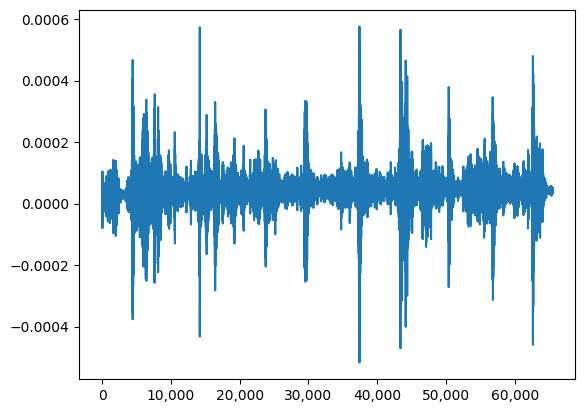

In [ ]:
plt.plot(x[0]);
plt.gca().get_xaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.show()

In [ ]:
#create labels for the 0 class:
y1=np.empty(x.shape[0])
for i in range(0,x.shape[0]):
  y1[i]=0
print(y1.shape)

(291,)


In [ ]:
#to obtain time series from all the setup: (CLASS 1 )
z1=tf.transpose(Data_13['data'])
z2=tf.transpose(Data_23['data'])
z3=tf.transpose(Data_33['data'])
z4=tf.transpose(Data_43['data'])
z5=tf.transpose(Data_53['data'])
z6=tf.transpose(Data_63['data'])
z7=tf.transpose(Data_73['data'])
z8=tf.transpose(Data_83['data'])
z9=tf.transpose(Data_93['data'])

In [ ]:
#array containing all the time series of the 1 class:
z=tf.concat((z2,z3,z4,z5,z6,z7,z8,z9),axis=0)
#we have 291 time series for the first class
#no z1 since is a different dimension and needs to be padded

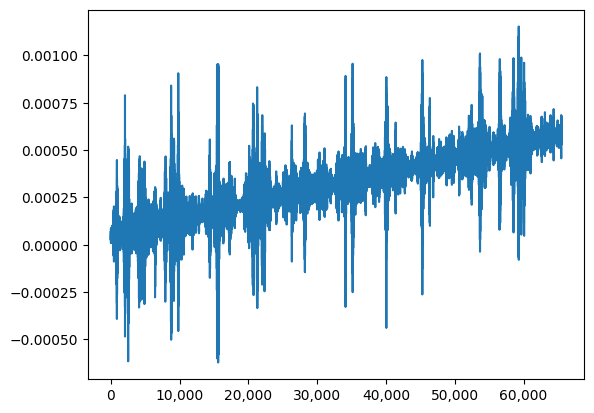

In [ ]:
plt.plot(z[0]);
plt.gca().get_xaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.show()

In [ ]:
#create labels for the 1 class:
y2=np.empty(z.shape[0])
for i in range(0,z.shape[0]):
  y2[i]=1
print(y2.shape)

(258,)


In [ ]:
#to obtain time series from all the setup: (CLASS 2 )
v1=tf.transpose(Data_14['data'])
v2=tf.transpose(Data_24['data'])
v3=tf.transpose(Data_34['data'])
v4=tf.transpose(Data_44['data'])
v5=tf.transpose(Data_54['data'])
v6=tf.transpose(Data_64['data'])
v7=tf.transpose(Data_74['data'])
v8=tf.transpose(Data_84['data'])
v9=tf.transpose(Data_94['data'])

In [ ]:
#array containing all the time series of the 2 class:
v=tf.concat((v1,v2,v3,v4,v5,v6,v7,v8,v9),axis=0)
#we have 291 time series for the first class

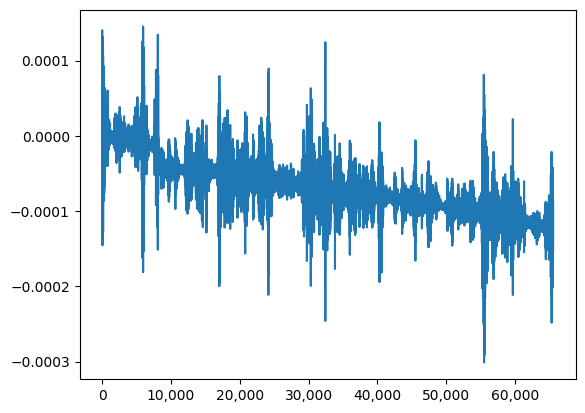

In [ ]:
plt.plot(v[0]);
plt.gca().get_xaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.show()

In [ ]:
#create labels for the 2 class:
y3=np.empty(v.shape[0])
for i in range(0,v.shape[0]):
  y3[i]=2
print(y3.shape)

(291,)


In [ ]:
#to obtain time series from all the setup: (CLASS 3 )
s1=tf.transpose(Data_15['data'])
s2=tf.transpose(Data_25['data'])
s3=tf.transpose(Data_35['data'])
s4=tf.transpose(Data_45['data'])
s5=tf.transpose(Data_55['data'])
s6=tf.transpose(Data_65['data'])
s7=tf.transpose(Data_75['data'])
s8=tf.transpose(Data_85['data'])
s9=tf.transpose(Data_95['data'])

In [ ]:
#array containing all the time series of the 3 class:
s=tf.concat((s1,s2,s3,s4,s5,s6,s7,s8,s9),axis=0)
#we have 291 time series for the first class

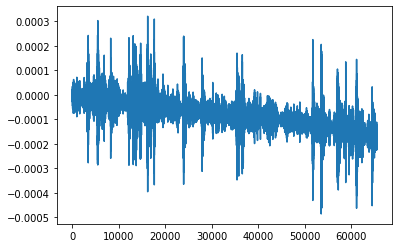

In [ ]:
plt.plot(s[0]); plt.show()

In [ ]:
#create labels for the 3 class:
y4=np.empty(s.shape[0])
for i in range(0,s.shape[0]):
  y4[i]=3
print(y4.shape)

(291,)


In [ ]:
#to obtain time series from all the setup: (CLASS 4 )
d1=tf.transpose(Data_16['data'])
d2=tf.transpose(Data_26['data'])
d3=tf.transpose(Data_36['data'])
d4=tf.transpose(Data_46['data'])
d5=tf.transpose(Data_56['data'])
d6=tf.transpose(Data_66['data'])
d7=tf.transpose(Data_76['data'])
d8=tf.transpose(Data_86['data'])
d9=tf.transpose(Data_96['data'])

In [ ]:
#array containing all the time series of the 3 class:
d=tf.concat((d1,d2,d3,d4,d5,d6,d7,d8,d9),axis=0)
#we have 291 time series for the first class

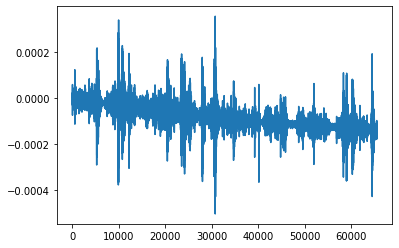

In [ ]:
plt.plot(d[0]); plt.show()

In [ ]:
#create labels for the 4 class:
y5=np.empty(d.shape[0])
for i in range(0,d.shape[0]):
  y5[i]=4
print(y5.shape)

(291,)


In [ ]:
#create the full dataset with labels
x_data=tf.concat((x,z,v,s,d),axis=0)
y_data=tf.concat((y1,y2,y3,y4,y5),axis=0)

In [ ]:
#convert the dataset to numpy array
x_data=np.array(x_data)
y_data=np.array(y_data)

In [ ]:
print(x_data.shape)
print(y_data.shape)

(1422, 65536)
(1422,)


In [ ]:
#normalize the data
x_data=tf.keras.utils.normalize(x_data)
x_data=np.array(x_data)

In [ ]:
#define the input dimension of our NN model
ninput = x_data.shape[1]
nsamples = x_data.shape[0]

In [ ]:
#create train and test dataset
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.333,
                                                    random_state=14)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(948, 65536)
(474, 65536)


In [ ]:
# define the callbacks for the model : early stopping very useful
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

In [ ]:
#define the model for training and testing purpose( here MLP)
model = keras.models.Sequential([
  keras.layers.Dense(128, input_dim=ninput, activation='relu'),
  keras.layers.Dense(64, activation='relu'),
  keras.layers.Dense(32, activation='relu'),
  #keras.layers.Dropout(0.2),
  keras.layers.Dense(5, activation='softmax')
])

optimizers = [tf.keras.optimizers.SGD(learning_rate = 0.01, momentum = 1.0), 'adadelta', 'adam']

model.compile(optimizer=optimizers[1],
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 128)               8388736   
                                                                 
 dense_11 (Dense)            (None, 64)                8256      
                                                                 
 dense_12 (Dense)            (None, 32)                2080      
                                                                 
 dense_13 (Dense)            (None, 5)                 165       
                                                                 
Total params: 8,399,237
Trainable params: 8,399,237
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
#start training the model
model.fit(X_train, y_train, batch_size=64,callbacks=[callback], epochs=200)

In [ ]:
#get the predicted labels from the test set
y_pred_sm = model.predict(X_test)
y_pred = np.argmax(y_pred_sm, axis=1)

In [ ]:
#evaluate the model
acc = model.evaluate(X_test, y_test)
print("Accuracy %.3f" %acc[-1])

In [ ]:
print(classification_report(y_test, y_pred, labels=None, target_names=['0','1','2','3','4'], digits=3))

In [ ]:
cm = confusion_matrix(y_test, y_pred, labels=None, sample_weight=None)
print(cm)
#plot_confusion_matrix(y_test, y_pred, classes=['0','1','2','3','4'], normalize=False)